In [3]:
import glob, os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv('final.csv')
x = df.loc[:,'Visitor-Points':'elo_diff'].values
y = df.loc[:,['score_gap_sign']].values
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [6]:
train_y = train_y.ravel()
test_y = test_y.ravel()

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
rfreg = RandomForestRegressor(n_estimators=100, max_depth=25, 
                              min_samples_split=2, min_samples_leaf=3, 
                              random_state=0)

In [9]:
feature_range = list(range(20,51))
param_grid = dict(max_features=feature_range)

In [10]:
grid = GridSearchCV(rfreg, param_grid, cv=10, return_train_score=False, n_jobs = -1)
grid.fit(train_x, train_y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [11]:
rfreg_best = RandomForestRegressor(n_estimators=100, **grid.best_params_, 
                              min_samples_split=2, min_samples_leaf=3, 
                              random_state=0)
rfreg_best.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [12]:
prediction_randomfroest = rfreg_best.predict(test_x)
error = np.sqrt(mean_squared_error(test_y, prediction_randomfroest))
print(error)

3.1355931747031276


In [14]:
# out-of-sample prediction
out_of_sample = pd.read_csv('Out_of_Sample.csv')
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
rfreg_best.fit(x,y)
pred = rfreg_best.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(error)

C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


3.9586783755031747


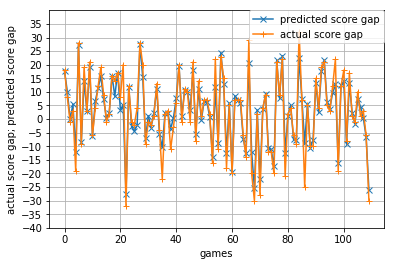

In [16]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

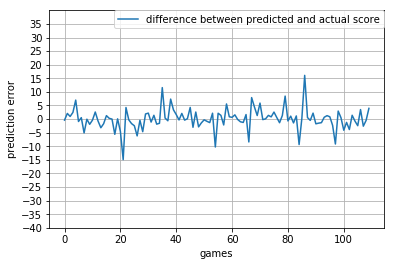

In [18]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
pred_actual_diff = [pred[i] - y_out[i] for i in range(len(pred))]
pred_actual_diff = [float(x) for x in pred_actual_diff]
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('prediction error')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x, pred_actual_diff, label="difference between predicted and actual score")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)